# COMP 5434 Assignment_1
ZHAO Baihan 21046974g
## Q1

$$\mathrm{TF}_{t,d} = \mathrm{log}_2(1 + f_{t,d})$$
$$\mathrm{IDF}_t = \mathrm{log}_2(\frac{N - n_t}{n_t} + 2) $$

In [59]:
import numpy as np

Input all documents

In [10]:
doc1=['business', 'bull', 'quarter', 'business', 'bull']
doc2=['bull', 'medicine', 'medicine']
doc3=['bull', 'quarter', 'medicine', 'business']

Get all tokens

In [17]:
doc = list(set(doc1 + doc2 + doc3))

In [18]:
doc1_count = [doc1.count(x) for x in doc]
doc2_count = [doc2.count(x) for x in doc]
doc3_count = [doc3.count(x) for x in doc]

Count $f_{t, d}$ for each token and document.

In [19]:
doc1_count, doc2_count, doc3_count

([0, 2, 2, 1], [2, 0, 1, 0], [1, 1, 1, 1])

In [21]:
doc1_TF = [np.log2(x + 1) for  x in doc1_count]
doc2_TF = [np.log2(x + 1) for  x in doc2_count]
doc3_TF = [np.log2(x + 1) for  x in doc3_count]

In [22]:
doc1_TF, doc2_TF, doc3_TF

([0.0, 1.584962500721156, 1.584962500721156, 1.0],
 [1.584962500721156, 0.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 1.0])

Count $n_t$ for each token.

In [37]:
n_t = np.array(doc1_count) + np.array(doc2_count) +  np.array(doc3_count)

In [38]:
n_t

array([3, 3, 4, 2])

In [32]:
N = 3

In [35]:
IDF = [np.log2((N - x) / x + 2) for x in n_t]

In [36]:
IDF

[1.0, 1.0, 0.8073549220576041, 1.3219280948873624]

Count $w_{t, d} = \mathrm{TF}_{t,d} * \mathrm{IDF}_t$.

In [39]:
w_1 = np.array(doc1_count) * n_t

In [43]:
w_2 = np.array(doc2_count) * n_t

In [44]:
w_3 = np.array(doc3_count) * n_t

In [45]:
w_1, w_2, w_3

(array([0, 6, 8, 2]), array([6, 0, 4, 0]), array([3, 3, 4, 2]))

Count cosine similarity for doc1,doc2 and doc1, doc3.count.
$$\mathrm{CosSim(q,x)} = \frac{q \cdot x} {||q|| || x||}$$

In [56]:
cos_similarity_12 = w_1 @ w_2 / (np.linalg.norm(w_1, ord=2) * np.linalg.norm(w_2, ord=2))

In [57]:
cos_similarity_13 = w_1 @ w_3 / (np.linalg.norm(w_1, ord=2) * np.linalg.norm(w_3, ord=2))

In [58]:
cos_similarity_12, cos_similarity_13

(0.43514263457633695, 0.8589844300173002)

## Q2

In [60]:
points = [[3, 9],
          [2, 8],
          [3, 8],
          [4, 8],
          [6, 8],
          [7, 8],
          [2, 7],
          [3, 7],
          [5, 7],
          [7, 7],
          [3, 6],
          [4, 6],
          [6, 6],
          [7, 6],
          [6, 5],
          [3, 4],
          [7, 4],
          [1, 3],
          [3, 3],
          [4, 3],
          [6, 3],
          [7, 3],
          [8, 3],
          [9, 3],
          [2, 2],
          [2, 1]]

In [61]:
points = np.array(points)

In [62]:
import matplotlib.pyplot as plt

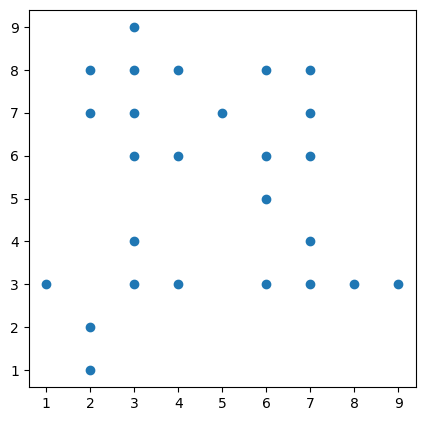

In [149]:

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [77]:
min_point_num = 4
eps = np.sqrt(2)
inner_point = []
for i in range(len(points)):
    point_test = points[i, :]
    inner_point_num = 0
    for j in range(len(points)):
        point = points[j, :]
        dis = np.linalg.norm(point_test - point)
        inner_point_num += 0 if dis > eps else 1
    inner_point.append(inner_point_num - 1)
        

In [90]:
inner_point

array([3, 4, 5, 4, 3, 2, 4, 6, 4, 4, 3, 3, 4, 3, 3, 2, 4, 1, 3, 2, 2, 3,
       3, 1, 3, 1])

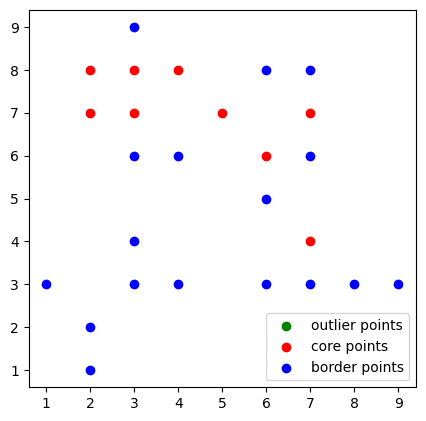

In [97]:
inner_point = np.array(inner_point)
outlier = points[inner_point == 0]
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(outlier[:, 0], outlier[:, 1], c='green', label='outlier points')

core_points = points[inner_point >= 4]
plt.scatter(core_points[:, 0], core_points[:, 1], c='red', label='core points')

border_points = points[(inner_point <4) & (inner_point > 0)]
plt.scatter(border_points[:, 0], border_points[:, 1], c='blue', label='border points')
plt.legend()
plt.show()

The red points are the core points, and the blue points are the border points.
It is clear that there are no outliers.

- Choose poing b as the first point to star the DBSCAN.

In [113]:
def get_near_points(x):
    neighborhood = []
    for i in range(len(points)):
        y = points[i, :]
        if np.linalg.norm(y - x) <= eps:
            neighborhood.append(i)
    return set(neighborhood)

In [132]:
points_in =set()
point_checked = set()

b_neighborhood = get_near_points(points[1, :])

points_in = points_in.union(b_neighborhood)

point_need_check = b_neighborhood.difference(point_checked)

In [150]:
while len(point_need_check) > 0:
    x = point_need_check.pop()
    point_checked.update({x})
    x_neighborhood = get_near_points(points[x, :])
    x_point_need_check = x_neighborhood.difference(point_checked)
    point_need_check = point_need_check.union(x_point_need_check)

In [145]:
point_checked

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 20, 21, 22, 23}

In [146]:
checked_points = points[np.array(list(point_checked)), :]

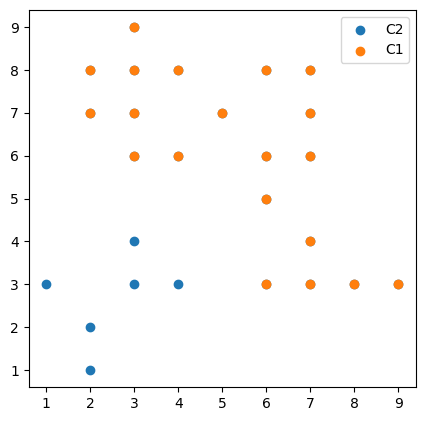

In [151]:

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(points[:, 0], points[:, 1], label='C2')

plt.scatter(checked_points[:, 0], checked_points[:, 1], label='C1')
plt.legend()
plt.show()


As the picture shows, when we choose the b(2, 8) as the first point to start DBSCAN, all the oranges points are detected in the first step. So, they are the first Cluster.
And it is clear to see that, points lasted are the second Cluster.

## Q3


In [153]:
T_1 = {'A', 'B', 'C'}
T_2 = {'E', 'B', 'D'}
T_3 = {'A', 'B', 'D', 'E'}
T_4 = {'D', 'E'}
T_5 = {'F'}
T = [T_1, T_2, T_3, T_4, T_5]

In [156]:
TT = set()
for t in T:
    TT = TT.union(t)
print(TT)

{'B', 'A', 'F', 'D', 'C', 'E'}


In [157]:
from itertools import chain, combinations

def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

In [160]:
for tt in powerset(list(TT)):
    print(set(tt))

set()
{'B'}
{'A'}
{'F'}
{'D'}
{'C'}
{'E'}
{'B', 'A'}
{'F', 'B'}
{'D', 'B'}
{'B', 'C'}
{'B', 'E'}
{'F', 'A'}
{'D', 'A'}
{'C', 'A'}
{'A', 'E'}
{'F', 'D'}
{'F', 'C'}
{'F', 'E'}
{'D', 'C'}
{'D', 'E'}
{'C', 'E'}
{'F', 'B', 'A'}
{'D', 'B', 'A'}
{'C', 'B', 'A'}
{'B', 'A', 'E'}
{'F', 'D', 'B'}
{'F', 'B', 'C'}
{'F', 'B', 'E'}
{'D', 'B', 'C'}
{'D', 'B', 'E'}
{'B', 'C', 'E'}
{'F', 'D', 'A'}
{'C', 'F', 'A'}
{'F', 'A', 'E'}
{'C', 'D', 'A'}
{'D', 'A', 'E'}
{'C', 'A', 'E'}
{'F', 'D', 'C'}
{'F', 'D', 'E'}
{'F', 'C', 'E'}
{'D', 'C', 'E'}
{'F', 'D', 'B', 'A'}
{'C', 'F', 'B', 'A'}
{'F', 'B', 'A', 'E'}
{'C', 'D', 'B', 'A'}
{'D', 'B', 'A', 'E'}
{'C', 'B', 'A', 'E'}
{'F', 'D', 'B', 'C'}
{'F', 'D', 'B', 'E'}
{'F', 'B', 'C', 'E'}
{'D', 'B', 'C', 'E'}
{'C', 'F', 'D', 'A'}
{'F', 'D', 'A', 'E'}
{'C', 'F', 'A', 'E'}
{'C', 'D', 'A', 'E'}
{'F', 'D', 'C', 'E'}
{'F', 'B', 'A', 'D', 'C'}
{'F', 'E', 'B', 'A', 'D'}
{'F', 'E', 'B', 'A', 'C'}
{'E', 'B', 'A', 'D', 'C'}
{'F', 'E', 'B', 'D', 'C'}
{'F', 'E', 'A', 'D', 'C'}
{'